In [70]:
#step1 importing lib and  edgehistograms
import os
import numpy as np
from skimage import io, color, filters, exposure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
import matplotlib.pyplot as plt
# Paths to the image directories
image_paths = [
    "C:\\Users\\rysad\\OneDrive\\Desktop\\Data Science\\DM-1\\datasets\\ResizedImages\\n02088094-Afghan_hound",
    "C:\\Users\\rysad\\OneDrive\\Desktop\\Data Science\\DM-1\\datasets\\ResizedImages\\n02088466-bloodhound",
    "C:\\Users\\rysad\\OneDrive\\Desktop\\Data Science\\DM-1\\datasets\\ResizedImages\\n02098413-Lhasa",
    "C:\\Users\\rysad\\OneDrive\\Desktop\\Data Science\\DM-1\\datasets\\ResizedImages\\n02107312-miniature_pinscher"
]

# Function to load and preprocess images
def load_images(image_paths):
    images = []
    labels = []
    for label, path in enumerate(image_paths):
        for image_file in os.listdir(path):
            image = io.imread(os.path.join(path, image_file))
            image = color.rgb2gray(image)
            image = angle(filters.sobel_h(image), filters.sobel_v(image))
            hist, _ = exposure.histogram(image, nbins=36)
            images.append(hist)
            labels.append(label)
    return np.array(images), np.array(labels)

# Function to calculate angle
def angle(dx, dy):
    return np.mod(np.arctan2(dy, dx), np.pi)

# Load and preprocess images
X, y = load_images(image_paths)


In [54]:
# Step 2: Dataset Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Data Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

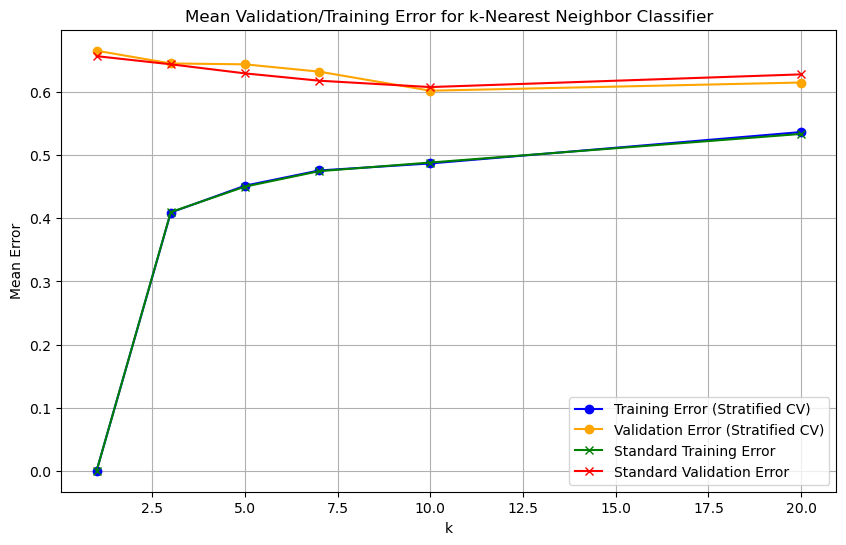

In [73]:



# Step 4: Model Selection
# Initialize k values for k-Nearest Neighbor Classifier
neighbors = [1, 3, 5, 7, 10, 20]

# Function to perform cross-validation for k-Nearest Neighbor Classifier
def perform_cross_validation(X_train, y_train, k_values):
    mean_validation_errors = []
    mean_training_errors = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        train_errors = []
        val_errors = []
        for train_index, val_index in skf.split(X_train, y_train):
            X_tr, X_val = X_train[train_index], X_train[val_index]
            y_tr, y_val = y_train[train_index], y_train[val_index]
            knn.fit(X_tr, y_tr)
            train_pred = knn.predict(X_tr)
            val_pred = knn.predict(X_val)
            train_errors.append(1 - np.mean(train_pred == y_tr))
            val_errors.append(1 - np.mean(val_pred == y_val))
        mean_training_errors.append(np.mean(train_errors))
        mean_validation_errors.append(np.mean(val_errors))
    return mean_training_errors, mean_validation_errors

# Perform cross-validation for k-Nearest Neighbor Classifier
train_errors, val_errors = perform_cross_validation(X_train_scaled, y_train, neighbors)

# Step 5: Error Analysis
# Plot mean validation/training error curves
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_errors, label='Training Error (Stratified CV)', marker='o', color='blue')
plt.plot(neighbors, val_errors, label='Validation Error (Stratified CV)', marker='o', color='orange')
plt.plot(neighbors, standard_train, label='Standard Training Error', marker='x', color='green')
plt.plot(neighbors, standard_val, label='Standard Validation Error', marker='x', color='red')
plt.xlabel('k')
plt.ylabel('Mean Error')
plt.title('Mean Validation/Training Error for k-Nearest Neighbor Classifier')
plt.legend()
plt.grid(True)
plt.show()




In [74]:
# Step 6: Test Error Calculation
# Use the k value with the lowest mean validation error
best_k_val_index = np.argmin(val_errors)
best_k_val = neighbors[best_k_val_index]
knn = KNeighborsClassifier(n_neighbors=best_k_val)
knn.fit(X_train_scaled, y_train)
test_pred = knn.predict(X_test_scaled)
test_error = 1 - np.mean(test_pred == y_test)
print("Test Error with least stratified value is at :", test_error)

Test Error with least stratified value is at : 0.6379310344827587


In [75]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
import matplotlib.pyplot as plt
def train_neural_network(X_train, y_train, X_val, y_val):
    clf = MLPClassifier(max_iter=500, random_state=42)
    clf.fit(X_train, y_train)
    return clf.predict(X_val), clf

def train_gaussian_nb(X_train, y_train, X_val, y_val):
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    return clf.predict(X_val), clf

def train_adaboost(X_train, y_train, X_val, y_val):
    clf = AdaBoostClassifier(n_estimators=50, random_state=42)
    clf.fit(X_train, y_train)
    return clf.predict(X_val), clf


In [76]:
# Check the size of the test set
test_set_size = len(X_test)
print("Number of samples in the test set:", test_set_size)
# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Number of samples in the test set: 174
Training set shape: (694, 36)
Test set shape: (174, 36)


In [77]:
def plot_confusion_matrix(cm, classes, title):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def evaluate_model(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    plot_confusion_matrix(cm, classes, "Confusion Matrix")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")


In [78]:
def perform_cross_validation(X, y, model_fn):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []
    f1_scores = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_val = X[train_index], X[test_index]
        y_train, y_val = y[train_index], y[test_index]
        
        y_pred, _ = model_fn(X_train, y_train, X_val, y_val)
        
        accuracies.append(accuracy_score(y_val, y_pred))
        f1_scores.append(f1_score(y_val, y_pred, average='weighted'))
    
    return accuracies, f1_scores


In [83]:
# Compare mean accuracies and F1 scores
print("\nMean Accuracies:")
print("Neural Network:", np.mean(nn_accuracies))
print("Gaussian Naive Bayes:", np.mean(gnb_accuracies))
print("AdaBoost:", np.mean(adaboost_accuracies))

print("\nMean F1 Scores:")
print("Neural Network:", np.mean(nn_f1_scores))
print("Gaussian Naive Bayes:", np.mean(gnb_f1_scores))
print("AdaBoost:", np.mean(adaboost_f1_scores))







Mean Accuracies:
Neural Network: 0.41490981128140964
Gaussian Naive Bayes: 0.40624543843186317
AdaBoost: 0.38183713898446464

Mean F1 Scores:
Neural Network: 0.3915889712144776
Gaussian Naive Bayes: 0.3720363020633757
AdaBoost: 0.3760240413965179


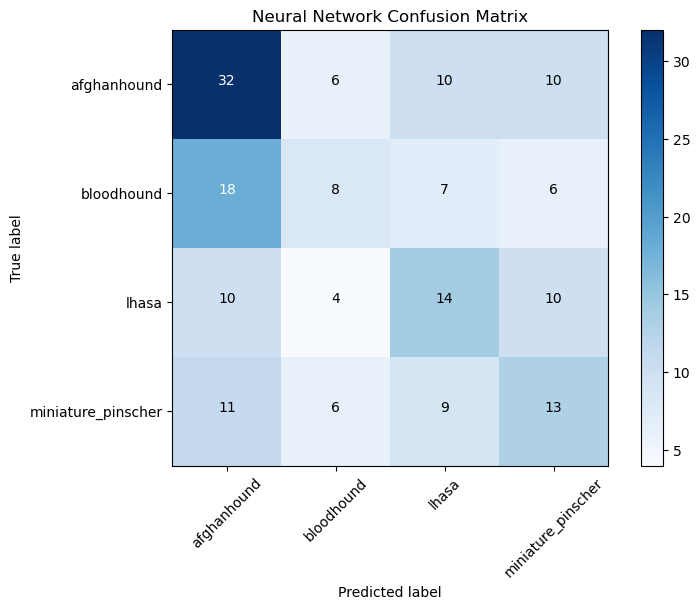

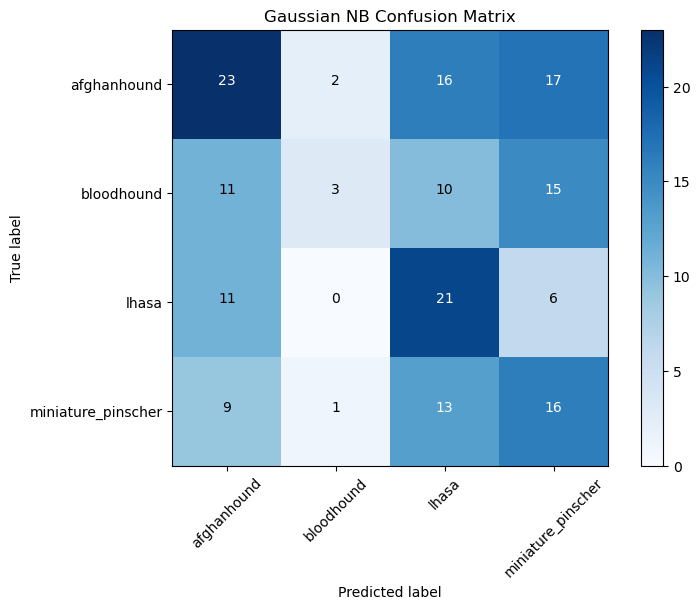

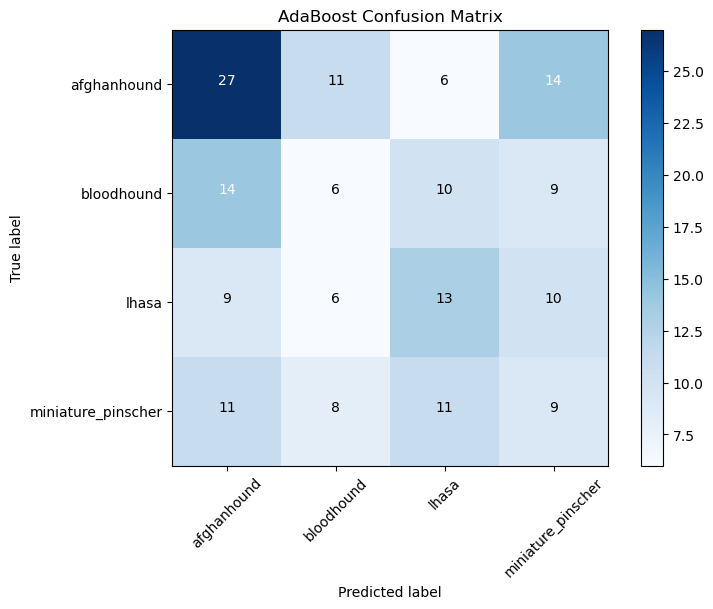

In [80]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Step 7: Performance Comparison
# Implement classification methods (Neural Network, Gaussian Naive Bayes, AdaBoost, Random Forest)
classifiers = {
    'Neural Network': MLPClassifier(hidden_layer_sizes=(10, 10, 10)),
    'Gaussian NB': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    
}

# Plot confusion matrix for each classifier separately
for clf_name, clf in classifiers.items():
    # Fit the classifier
    clf.fit(X_train_scaled, y_train)
    # Predict labels for test set
    y_pred = clf.predict(X_test_scaled)
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(clf_name + ' Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.show()


In [ ]:
# REFERENCES:
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
# https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

7.
Based on the confusion matrices, Neural Network confusion matrix is best method because the diagonal shows the correct no of breeds n=67.
Based on the provided mean accuracies and F1 scores:
1. Mean Accuracies: The Neural Network classifier has the highest mean accuracy among all three classifiers, with approximately 41.49%. It is followed by Gaussian Naive Bayes with around 40.62% and AdaBoost with approximately 38.18%.
2. Mean F1 Scores: Again, the Neural Network classifier achieves the highest mean F1 score, with approximately 39.16%. Gaussian Naive Bayes follows with around 37.20%, and AdaBoost has a mean F1 score of approximately 37.60%.